# Having Technical Indicators In The State Representation

In this particular notebook, we added eight different technical indicators into the state representation, enabling the agent to choose the best action based on the current state. Additionally, we used 14 as the window size and then split the dataset into two groups: training and testing. We trained the agent for 250,000 timesteps, equivalent to 117 episodes. At the end, we evaluated the agent's performance based on the average total reward and average total profit gained after a 10-episode evaluation on unseen data (testing data).

### Pip Install Command

In [43]:
!pip install gymnasium gym-anytrading pandas matplotlib stable-baselines3[extra] finta

### Libraries

In [44]:
import gymnasium as gym
import gym_anytrading
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions

from stable_baselines3 import DQN
from stable_baselines3 import A2C
from stable_baselines3 import PPO



from gym_anytrading.envs import StocksEnv
from finta import TA






### Const Values

In [45]:
WINDOW_SIZE = 14
DATASET_PATH = '/content/TSLA.csv'


### Methods

add_signals() is a method where we can include the components we want to have in the state representation. So here we are adding following components into the state:

1. Low
2. High
3. Close
4. SMA
5. RSI
6. MOM
7. OBV
8. EMA
9. Stochastic oscillator
10. AD
11. ROC

In [ ]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Close'].to_numpy()[start:end]
    diff = np.insert(np.diff(prices), 0, 0)
    signal_features = env.df.loc[:, ['Low','High','Close','SMA', 'RSI', 'MOM', 'OBV', 'EMA', 'Stochastic oscillator', 'AD', 'ROC']].to_numpy()[start:end]
    # Reshape diff to (282, 1)
    diff_reshaped = diff.reshape(len(diff), 1)

    # Concatenate along the second axis (columns)
    signal_features = np.concatenate((signal_features, diff_reshaped), axis=1)


    return prices, signal_features

Read the dataset and preprocess it

In [46]:
df = pd.read_csv(DATASET_PATH)

Change the type of Date column to datetime

In [47]:
df['Date'] = pd.to_datetime(df.Date)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


Make the Date column an index

In [49]:
df.set_index('Date', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Sort it by index

In [50]:
df.sort_index(inplace=True)

In [51]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2956 entries, 2010-06-29 to 2022-03-24
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2956 non-null   float64
 1   High       2956 non-null   float64
 2   Low        2956 non-null   float64
 3   Close      2956 non-null   float64
 4   Adj Close  2956 non-null   float64
 5   Volume     2956 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 161.7 KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Calculate the technical indicator using `finta` package and store the resent in the corresponding column in the dataset

In [53]:
df['SMA'] = TA.SMA(df, WINDOW_SIZE)
df['RSI'] = TA.RSI(df, WINDOW_SIZE)
df['MOM'] = TA.MOM(df, WINDOW_SIZE)
df['OBV'] = TA.OBV(df,'close')
df['EMA'] = TA.EMA(df, WINDOW_SIZE)
df['Stochastic oscillator'] = TA.AO(df,WINDOW_SIZE)
df['AD'] = TA.ADL(df)
df['ROC'] = TA.ROC(df,WINDOW_SIZE)
df.fillna(0, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
df.head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,MOM,OBV,EMA,Stochastic oscillator,AD,ROC
Date,,,,,,,,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,0.000000,0.000000,0.000,0.0,4.778000,0.000000,6.590845e+07,0.000000
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,0.000000,0.000000,0.000,-85935500.0,4.771571,0.000000,-7.233279e+06,0.000000
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,0.000000,0.000000,0.000,-127029500.0,4.626574,0.000000,-2.374361e+07,0.000000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,0.000000,0.000000,0.000,-152728500.0,4.385939,0.000000,-4.370570e+07,0.000000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,0.000000,0.000000,0.000,-187063000.0,4.082269,0.000000,-7.342934e+07,0.000000
2010-07-07,3.280,3.326,2.996,3.160,3.160,34608500,0.000000,0.000000,0.000,-221671500.0,3.868872,0.000000,-7.363909e+07,0.000000
2010-07-08,3.228,3.504,3.114,3.492,3.492,38557000,0.000000,20.112173,0.000,-183114500.0,3.789457,0.000000,-3.745482e+07,0.000000
2010-07-09,3.516,3.580,3.310,3.480,3.480,20253000,0.000000,19.955945,0.000,-203367500.0,3.728932,0.000000,-3.220405e+07,0.000000
2010-07-12,3.590,3.614,3.400,3.410,3.410,11012500,0.000000,19.027444,0.000,-214380000.0,3.670209,0.000000,-4.218734e+07,0.000000


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Create a class and inherit it from StockEnv and update the _process_data method with add_signals

In [56]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals

Split the dataset

In [57]:
train_df = df.loc[df.index < '2019-01-01']
test_df = df.loc[df.index >= '2019-01-01']

print('train_df: ',len(train_df))
print('test_df: ',len(test_df))

train_df:  2142
test_df:  814


In [58]:
train_df.shape

(2142, 14)

Create an environment and provide training data

In [59]:
env = MyCustomEnv(df=train_df, frame_bound=(WINDOW_SIZE, len(train_df)), window_size=WINDOW_SIZE)

A single vector representing the state.

In [60]:
env.signal_features[:1,:]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[3.50800000e+00, 5.00000000e+00, 4.77800000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.77800000e+00,
        0.00000000e+00, 6.59084531e+07, 0.00000000e+00, 0.00000000e+00]])

In [61]:
env.action_space

Discrete(2)

Discrete: describes a discrete space where {0, 1, …, n-1} are the possible values our observation or action can take. Values can be shifted to {a, a+1, …, a+n-1} using an optional argument.

In [62]:
env.action_space.sample()

0

Sell = 0

Buy = 1

In [63]:
env.observation_space

Box(-10000000000.0, 10000000000.0, (14, 12), float32)

Box: describes an n-dimensional continuous space. It’s a bounded space where we can define the upper and lower limits which describe the valid values our observations can take.



In [64]:
env.observation_space.sample()

array([[-3.4595871e+09, -1.9842057e+09,  1.2763041e+09,  5.8961096e+09,
        -5.8892539e+09, -5.0234117e+09,  5.1774961e+09, -7.5673395e+09,
         5.9419612e+09, -1.9980179e+09,  3.5283538e+09,  1.4441797e+09],
       [ 2.0432905e+09,  3.5179218e+09, -5.3230080e+09, -2.9908726e+09,
         2.5605614e+09, -5.9307950e+09, -3.0257664e+09,  4.1541832e+09,
         9.6695173e+09, -6.0850099e+09, -7.0584530e+09, -1.5160284e+09],
       [-5.5289508e+09,  8.1058376e+09, -4.0045519e+09, -2.8494602e+09,
        -5.4310697e+09, -1.4064413e+09,  1.2436427e+08,  9.2539187e+08,
         7.0039834e+09,  9.8671053e+09,  4.6981325e+09, -5.0191258e+09],
       [-6.0362988e+09,  6.7782405e+09, -5.6798822e+09, -4.1217833e+09,
         7.0355558e+09, -4.8291171e+08, -9.7332541e+09, -7.2254638e+09,
        -9.5692022e+09,  8.7604900e+09,  3.2789548e+09,  5.2867446e+09],
       [-8.4874092e+09,  8.4013588e+09,  3.8755991e+09, -7.6684513e+09,
         1.5892794e+09, -7.0970481e+09,  6.5471534e+09, -8.8

Create the environment and do some random action on it

info: {'total_reward': 45.983995000000014, 'total_profit': 0.004284681837425818, 'position': <Positions.Short: 0>}


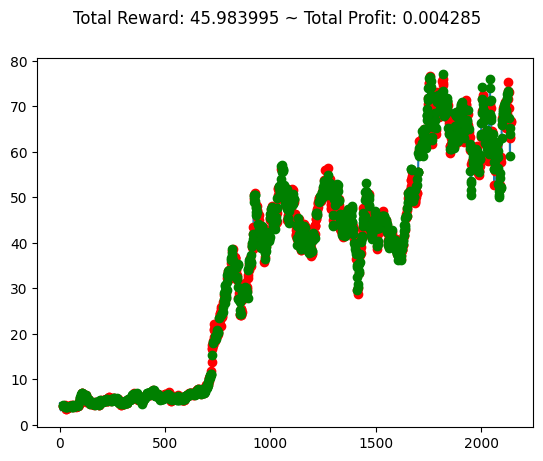

In [65]:

observation = env.reset(seed=2024)
while True:
    action = env.action_space.sample()
    observation, reward, terminated, truncated, info = env.step(action)
    done = terminated or truncated
    # env.render()
    if done:
        print("info:", info)
        break

plt.cla()
env.unwrapped.render_all()
plt.show()

Create and training the A2C model on 250000 timesteps

In [66]:
model = A2C("MlpPolicy", env, verbose=1)
model.learn(total_timesteps=250000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.13e+03 |
|    ep_rew_mean      | 28.5     |
|    exploration_rate | 0.677    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 465      |
|    time_elapsed     | 18       |
|    total_timesteps  | 8508     |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.53e+05 |
|    n_updates        | 2101     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 2.13e+03 |
|    ep_rew_mean      | 17.6     |
|    exploration_rate | 0.353    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 518      |
|    time_elapsed     | 32       |
|    total_timesteps  | 17016    |
| train/              |        

Save model

In [67]:
# model.save('ppo_1000000_15_senti')

In [68]:
# del model

Load model

In [69]:
# model = A2C.load('/content/ppo_1000000_15_senti.zip')

Evaluate the model using new environment which will have the testing data, for 10 episodes.

In [72]:
env = MyCustomEnv(df=test_df, frame_bound=(WINDOW_SIZE, len(test_df)), window_size=WINDOW_SIZE)

avg_reward = []
avg_profit = []

for i in range(10):

  observation, info = env.reset(seed=2024)
  while True:
      # print('ob',observation)
      action = model.predict(observation)
      # print('action',action[0])
      observation, reward, terminated, truncated, info = env.step(action[0])
      done = terminated or truncated

      # env.render()
      if done:
          print("info:", info)
          avg_reward.append(info['total_reward'])
          avg_profit.append(info['total_profit'])
          break

  # plt.cla()
  # env.unwrapped.render_all()
  # plt.show()

print('\nAverage reward: ', np.mean(avg_reward))
print('\nAverage profit: ', np.mean(avg_profit))

info: {'total_reward': 170.192043, 'total_profit': 2.094368157857469, 'position': <Positions.Short: 0>}
info: {'total_reward': 182.76209799999995, 'total_profit': 2.505634612946273, 'position': <Positions.Short: 0>}
info: {'total_reward': 115.47015200000001, 'total_profit': 1.8125883855849827, 'position': <Positions.Short: 0>}
info: {'total_reward': 132.38784500000014, 'total_profit': 2.5882231688744466, 'position': <Positions.Short: 0>}
info: {'total_reward': 138.46609200000012, 'total_profit': 2.245323348951303, 'position': <Positions.Short: 0>}
info: {'total_reward': 93.01194499999977, 'total_profit': 2.1693972625553286, 'position': <Positions.Short: 0>}
info: {'total_reward': 116.4699580000003, 'total_profit': 2.1047885283253556, 'position': <Positions.Short: 0>}
info: {'total_reward': 197.96001999999982, 'total_profit': 1.8445162476971009, 'position': <Positions.Short: 0>}
info: {'total_reward': 149.0900329999999, 'total_profit': 2.2919364536878137, 'position': <Positions.Short: 0

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
